In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image_pipeline(path, se_size=3):
    # read image (BGR) and convert to RGB
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Step 1: create exact-red and exact-blue binary images
    R = img[..., 0]; G = img[..., 1]; B = img[..., 2]
    bin_red  = ((R == 255) & (G == 0)   & (B == 0)).astype(np.uint8) * 255
    bin_blue = ((R == 0)   & (G == 0)   & (B == 255)).astype(np.uint8) * 255

    # show Step 1
    plt.figure(figsize=(10,4))
    plt.suptitle("Step 1 — Original and Exact-color Binary Images")
    plt.subplot(1,3,1); plt.imshow(img); plt.title("Original RGB"); plt.axis('off')
    plt.subplot(1,3,2); plt.imshow(bin_red, cmap='gray'); plt.title("Binary: Exact Red"); plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(bin_blue, cmap='gray'); plt.title("Binary: Exact Blue"); plt.axis('off')
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

    # Step 2: morphological processing on both binary images using structuring element
    se = np.ones((se_size, se_size), dtype=np.uint8)
    # apply closing (dilation followed by erosion) to each binary image
    morph_red  = cv2.morphologyEx(bin_red,  cv2.MORPH_CLOSE, se)
    morph_blue = cv2.morphologyEx(bin_blue, cv2.MORPH_CLOSE, se)

    # show Step 2
    plt.figure(figsize=(10,4))
    plt.suptitle("Step 2 — Morphological Processing (closing)")
    plt.subplot(2,2,1); plt.imshow(bin_red,  cmap='gray'); plt.title("Red Binary (input)"); plt.axis('off')
    plt.subplot(2,2,2); plt.imshow(morph_red, cmap='gray'); plt.title("Red Binary (morph)"); plt.axis('off')
    plt.subplot(2,2,3); plt.imshow(bin_blue,  cmap='gray'); plt.title("Blue Binary (input)"); plt.axis('off')
    plt.subplot(2,2,4); plt.imshow(morph_blue, cmap='gray'); plt.title("Blue Binary (morph)"); plt.axis('off')
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

    # Step 3: form one color image: R channel = morph_red, G channel = zeros, B channel = morph_blue
    H, W = morph_red.shape
    combined = np.zeros((H, W, 3), dtype=np.uint8)
    combined[..., 0] = morph_red    # R
    combined[..., 1] = 0            # G
    combined[..., 2] = morph_blue   # B

    # show Step 3
    plt.figure(figsize=(8,4))
    plt.suptitle("Step 3 — Combine Processed Binaries into Color Image")
    plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap='gray')
    plt.title("Original (grayscale)"); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(combined); plt.title("Combined (R=morph_red, B=morph_blue)"); plt.axis('off')
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

    return bin_red, bin_blue, morph_red, morph_blue, combined

# Example usage:
# bin_r, bin_b, morph_r, morph_b, combined = process_image_pipeline('input.png', se_size=3)


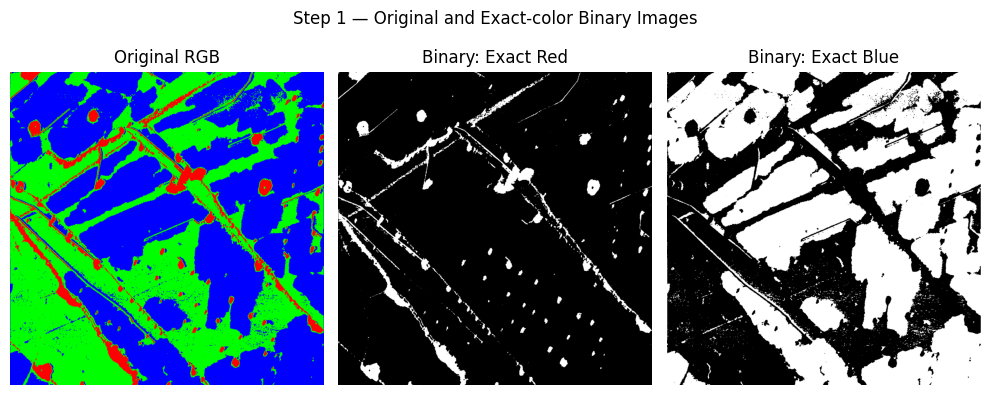

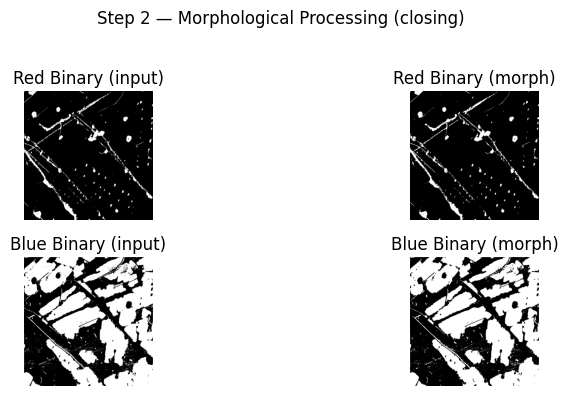

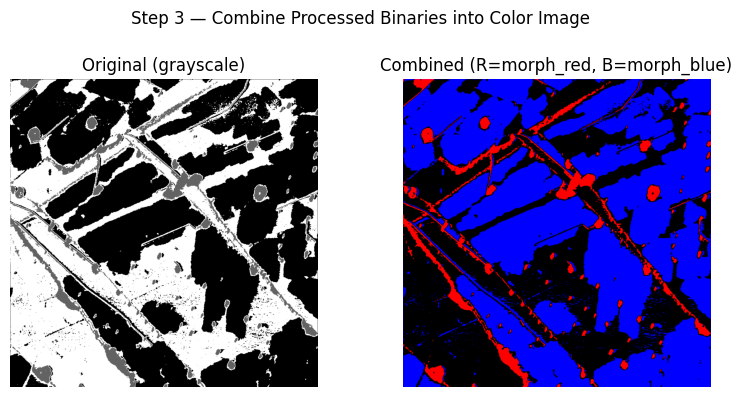

In [46]:
bin_red, bin_blue, morph_red, morph_blue, combined = process_image_pipeline("abc1.png")

In [47]:
prevT = bin_blue + bin_red

In [48]:
bin_blue = np.array(bin_blue==0,dtype=np.uint8)

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_hsi(image_path):
    # Read the image in RGB
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float64) / 255.0  # Normalize to [0,1]
    
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    
    # Intensity component
    I = (R + G + B) / 3.0
    
    # Saturation component
    min_rgb = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 / (R + G + B + 1e-12)) * min_rgb
    
    # Hue component
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G)**2 + (R - B)*(G - B)) + 1e-12
    theta = np.arccos(np.clip(numerator / denominator, -1, 1))
    
    H = np.zeros_like(R)
    H[B <= G] = theta[B <= G]
    H[B > G] = 2 * np.pi - theta[B > G]
    H = H / (2 * np.pi)  # Normalize hue to [0,1]
    
    # Display results
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title('Original RGB')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(H, cmap='gray')
    plt.title('Hue')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(S, cmap='gray')
    plt.title('Saturation')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(I, cmap='gray')
    plt.title('Intensity')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return H, S, I

# Example usage:
# H, S, I = rgb_to_hsi('lena.png')


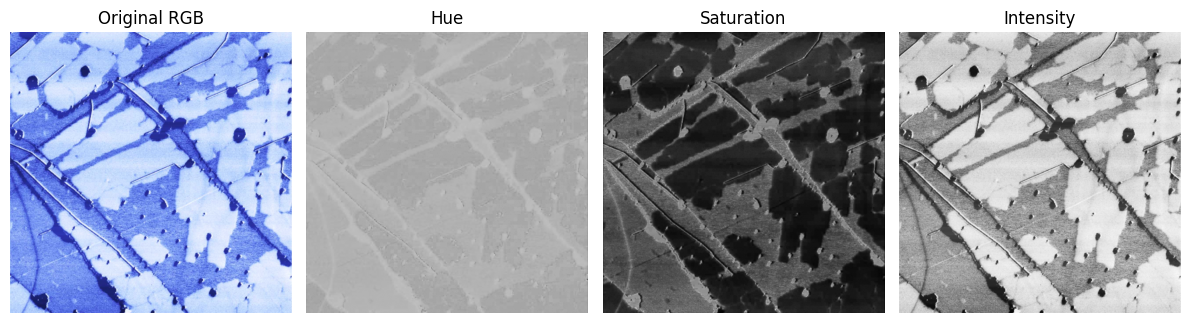

In [50]:
H,S,I = rgb_to_hsi("4d.jpg")

In [51]:
import cv2
import matplotlib.pyplot as plt

def otsu_thresholding(image_path):
    # Read the grayscale image
    img = image_path #cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Otsu's thresholding
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the results
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresh, cmap='gray')
    plt.title(f'Otsu Thresholded Image\n(Threshold = {_:.2f})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return thresh

# Example usage:
# thresh_img = otsu_thresholding('lena_gray.png')


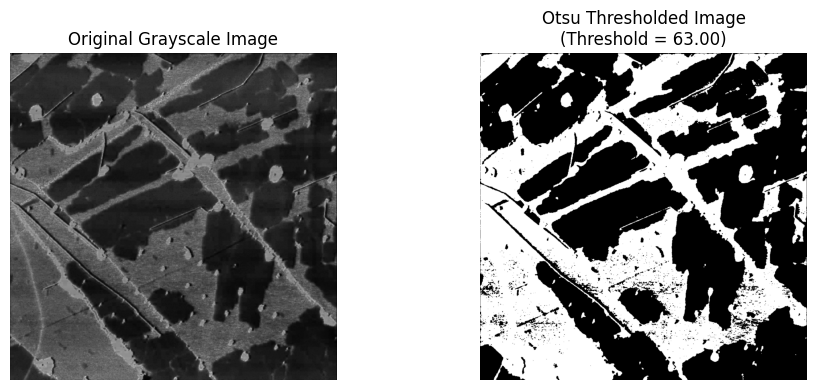

In [71]:
S1 = otsu_thresholding(np.array(S*255,dtype=np.uint8))

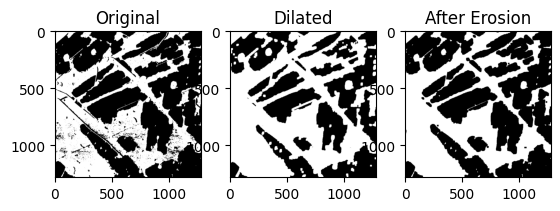

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = S1#cv2.imread('binary.png', 0)
kernel = np.ones((5,5), np.uint8)
dilated = cv2.dilate(img, kernel, iterations=3)
eroded = cv2.erode(dilated, kernel, iterations=3)
p1 = np.array(eroded,dtype=np.uint8)

plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(dilated, cmap='gray'), plt.title('Dilated')
plt.subplot(133), plt.imshow(eroded, cmap='gray'), plt.title('After Erosion')
plt.show()


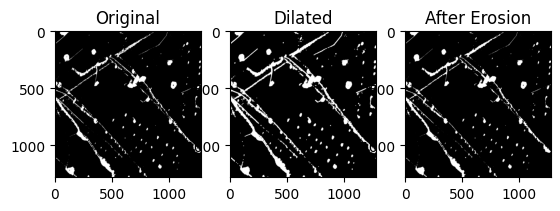

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = bin_red#cv2.imread('binary.png', 0)
kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(img, kernel, iterations=2)
eroded = cv2.erode(dilated, kernel, iterations=2)
p2 = np.array(eroded,dtype=np.uint8)

plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(dilated, cmap='gray'), plt.title('Dilated')
plt.subplot(133), plt.imshow(eroded, cmap='gray'), plt.title('After Erosion')
plt.show()


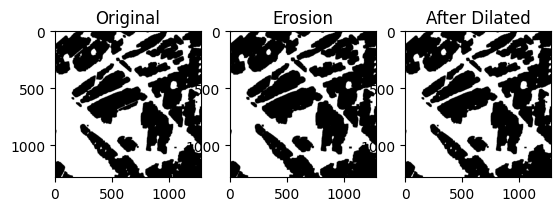

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = p1#eroded#cv2.imread('binary.png', 0)
kernel = np.ones((3,3), np.uint8)
eroded = cv2.erode(img, kernel, iterations=2)
dilated = cv2.dilate(eroded, kernel, iterations=2)

plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(eroded, cmap='gray'), plt.title('Erosion')
plt.subplot(133), plt.imshow(dilated, cmap='gray'), plt.title('After Dilated')
plt.show()


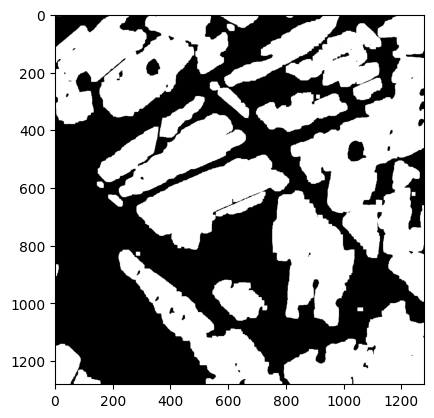

In [56]:
plt.imshow(p1==0,cmap="gray")

In [57]:
abc = np.array(p1==0,dtype = np.uint8)

In [58]:
np.shape(abc)

(1281, 1281)

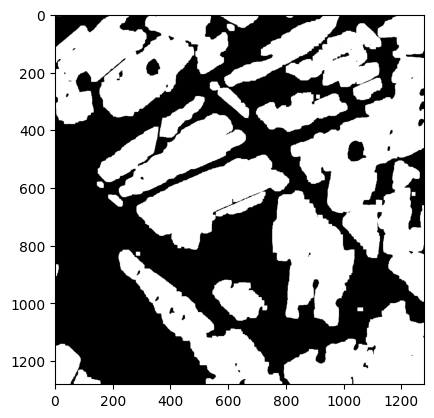

In [59]:
plt.imshow(abc ,cmap="gray")

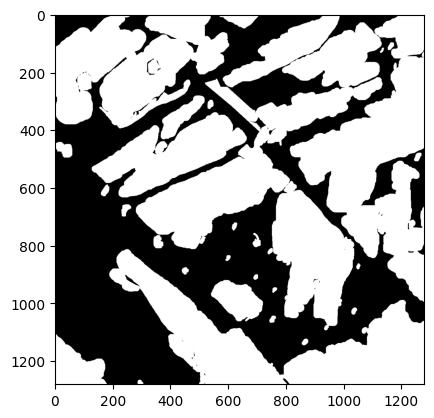

In [60]:
gt = cv2.imread("4dGT.png", cv2.IMREAD_GRAYSCALE)
_,gt = cv2.threshold(gt, 1, 255, cv2.THRESH_BINARY)
plt.imshow(gt,cmap="gray")

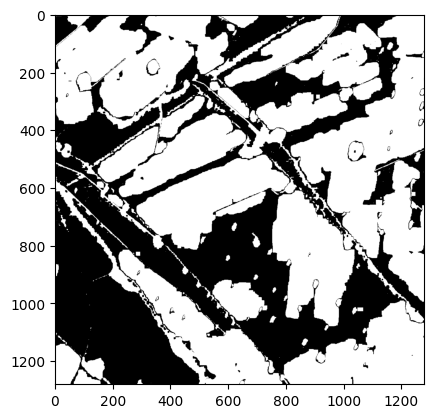

In [61]:
pf = abc + p2 
_,pf = cv2.threshold(pf, 0, 255, cv2.THRESH_BINARY)
plt.imshow(pf,cmap="gray")

In [62]:
import numpy as np

def iou_and_dice(gt, pred):
    """
    gt, pred: binary images (0/255) as numpy arrays, same shape.
    Returns (iou, dice)
    """
    # convert to boolean masks
    g = (np.asarray(gt) == 255)
    p = (np.asarray(pred) == 255)

    intersection = np.logical_and(g, p).sum()
    union = np.logical_or(g, p).sum()
    sum_sizes = g.sum() + p.sum()

    # IoU (intersection over union)
    if union == 0:
        iou = 1.0  # both empty -> perfect overlap
    else:
        iou = intersection / union

    # Dice coefficient
    if sum_sizes == 0:
        dice = 1.0
    else:
        dice = 2.0 * intersection / sum_sizes

    return float(iou), float(dice)

# Example usage:
# import cv2
# gt = cv2.imread('gt.png', cv2.IMREAD_GRAYSCALE)
# pred = cv2.imread('pred.png', cv2.IMREAD_GRAYSCALE)
# iou, dice = iou_and_dice(gt, pred)
# print("IoU:", iou, "Dice:", dice)


In [73]:
iou_and_dice(gt,pf)

(0.8738469613497549, 0.9326769788289565)

In [78]:
cv2.imwrite("GT1.png",gt)

True

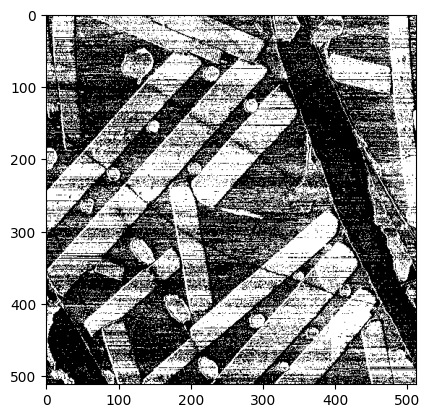

In [98]:
_,prevT = cv2.threshold(prevT, 0, 255, cv2.THRESH_BINARY)
plt.imshow(prevT, cmap ="gray")


In [99]:
iou_and_dice(gt,prevT)

(0.5914908484633019, 0.743316682008481)

In [67]:
cv2.imwrite("pf.png",pf)

True

In [66]:
pf = 255*abc + p2//2

In [65]:
np.max()

np.uint8(255)

In [74]:
iou_and_dice(gt,S1)

(0.06080575347090618, 0.1146406932125936)